In [85]:
from keras.datasets import fashion_mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU

In [86]:
#Loading the dataset. BuiltIn dataset is used
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X, train_Y, test_X, test_Y

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [87]:
def preprocess_data(train_X, test_X):
    # Reshape and normalize data
    train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    return train_X, test_X

In [88]:
def split_data(train_X, train_Y_one_hot):
    # Split train data into train and validation sets
    train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
    return train_X, valid_X, train_label, valid_label

In [89]:
def preprocess_labels(train_Y, test_Y):
    # One-hot encode labels
    train_Y_one_hot = to_categorical(train_Y)
    test_Y_one_hot = to_categorical(test_Y)
    return train_Y_one_hot, test_Y_one_hot


In [67]:
def build_model():
    # Define CNN model architecture
    num_classes = 10
    fashion_model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(64, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Conv2D(128, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Flatten(),
        Dense(128, activation='linear'),
        LeakyReLU(alpha=0.1),
        Dense(num_classes, activation='softmax')
    ])
    # Compile model
    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    return fashion_model

In [68]:
def train_model(model, train_X, train_label, valid_X, valid_label, epochs=5, batch_size=64): #epochs=20, batch_size=64
    # Train model
    fashion_train = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))
    return fashion_train

In [69]:
def evaluate_model(model, test_X, test_Y_one_hot):
    # Evaluate model
    test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])

In [70]:
def plot_metrics(history):
    # Plot training and validation metrics
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/5
750/750 [==============================] - 85s 112ms/step - loss: 0.4717 - accuracy: 0.8278 - val_loss: 0.3370 - val_accuracy: 0.8758
Epoch 2/5
750/750 [==============================] - 78s 104ms/step - loss: 0.2928 - accuracy: 0.8941 - val_loss: 0.2726 - val_accuracy: 0.8996
Epoch 3/5
750/750 [==============================] - 77s 103ms/step - loss: 0.2445 - accuracy: 0.9117 - val_loss: 0.2882 - val_accuracy: 0.8976
Epoch 4/5
750/750 [==============================] - 79s 106ms/step - loss: 0.2105 - accuracy: 0.9235 - val_loss: 0.2422 - val_accuracy: 0.9105
Epoch 5/5
750/750 [==============================] - 77s 103ms/step - loss: 0.1868 - accuracy: 0.9307 - val_loss: 0.2222 - val_accuracy: 0.9205
Test loss: 0.2431839108467102
Test accuracy: 0.909500002861023


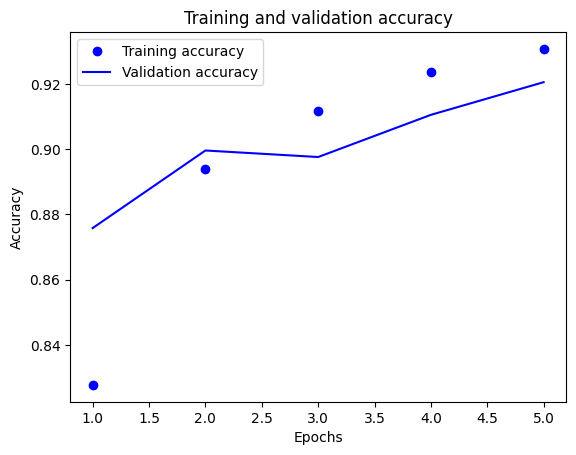

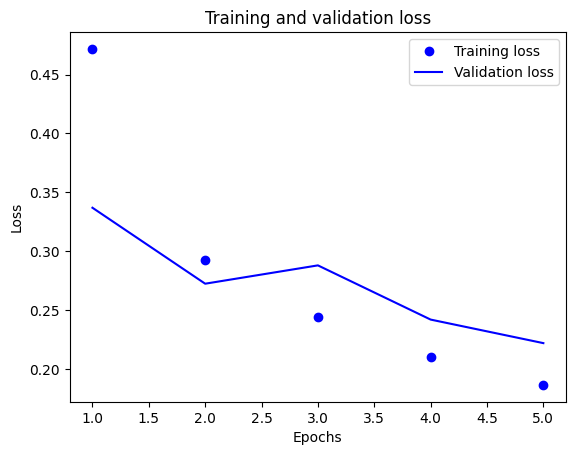

In [71]:
train_X, test_X = preprocess_data(train_X, test_X)
train_Y_one_hot, test_Y_one_hot = preprocess_labels(train_Y, test_Y)
train_X, valid_X, train_label, valid_label = split_data(train_X, train_Y_one_hot)
model = build_model()
history = train_model(model, train_X, train_label, valid_X, valid_label)
evaluate_model(model, test_X, test_Y_one_hot)
plot_metrics(history)

313/313 [==============================] - 6s 18ms/step
Found %d correct labels 9041


<ipython-input-72-1dfad92e271e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


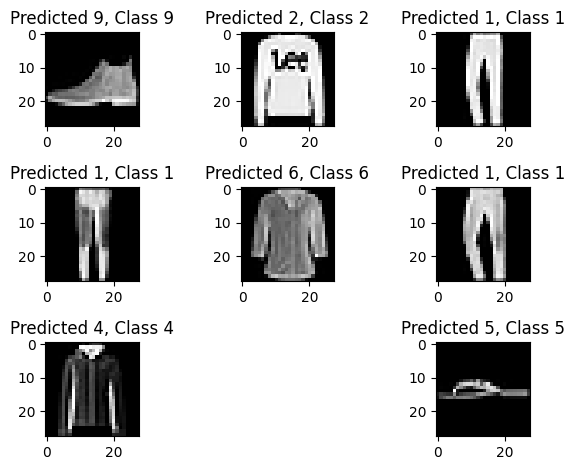

In [72]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct_indices = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels", len(correct_indices))
for i, correct_idx in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct_idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct_idx], test_Y[correct_idx]))
    plt.tight_layout()
plt.show()


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

Changed the activation function

In [90]:
def build_model():
    # Define CNN model architecture
    num_classes = 10
    fashion_model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(28, 28, 1), padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(64, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Conv2D(128, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Flatten(),
        Dense(128, activation='linear'),
        LeakyReLU(alpha=0.1),
        Dense(num_classes, activation='softmax')
    ])
    # Compile model
    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    return fashion_model

In [91]:
def train_model(model, train_X, train_label, valid_X, valid_label, epochs=5, batch_size=64): #epochs=20, batch_size=64
    # Train model
    fashion_train = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))
    return fashion_train

In [92]:
def evaluate_model(model, test_X, test_Y_one_hot):
    # Evaluate model
    test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])

In [93]:
def plot_metrics(history):
    # Plot training and validation metrics
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/5
750/750 [==============================] - 81s 107ms/step - loss: 0.4724 - accuracy: 0.8261 - val_loss: 0.3569 - val_accuracy: 0.8760
Epoch 2/5
750/750 [==============================] - 80s 107ms/step - loss: 0.2874 - accuracy: 0.8944 - val_loss: 0.2930 - val_accuracy: 0.8923
Epoch 3/5
750/750 [==============================] - 80s 107ms/step - loss: 0.2416 - accuracy: 0.9110 - val_loss: 0.2635 - val_accuracy: 0.9057
Epoch 4/5
750/750 [==============================] - 84s 112ms/step - loss: 0.2076 - accuracy: 0.9229 - val_loss: 0.2283 - val_accuracy: 0.9172
Epoch 5/5
750/750 [==============================] - 83s 110ms/step - loss: 0.1812 - accuracy: 0.9326 - val_loss: 0.2229 - val_accuracy: 0.9188
Test loss: 0.23927776515483856
Test accuracy: 0.9154000282287598


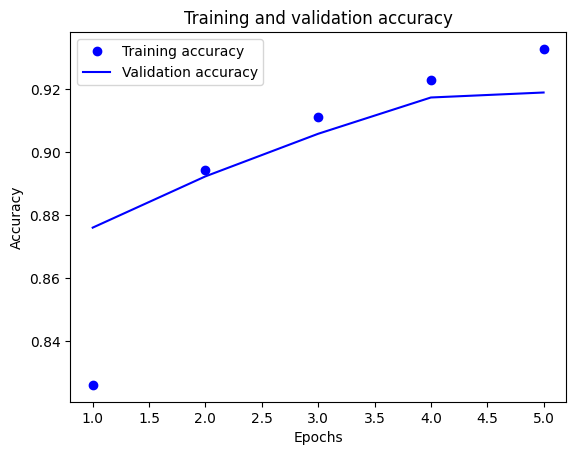

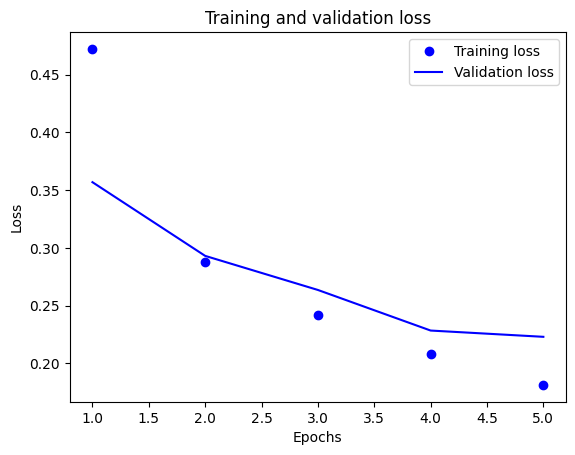

In [94]:
train_X, test_X = preprocess_data(train_X, test_X)
train_Y_one_hot, test_Y_one_hot = preprocess_labels(train_Y, test_Y)
train_X, valid_X, train_label, valid_label = split_data(train_X, train_Y_one_hot)
model = build_model()
history = train_model(model, train_X, train_label, valid_X, valid_label)
evaluate_model(model, test_X, test_Y_one_hot)
plot_metrics(history)

313/313 [==============================] - 5s 17ms/step
Found %d correct labels 9121


<ipython-input-95-1dfad92e271e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


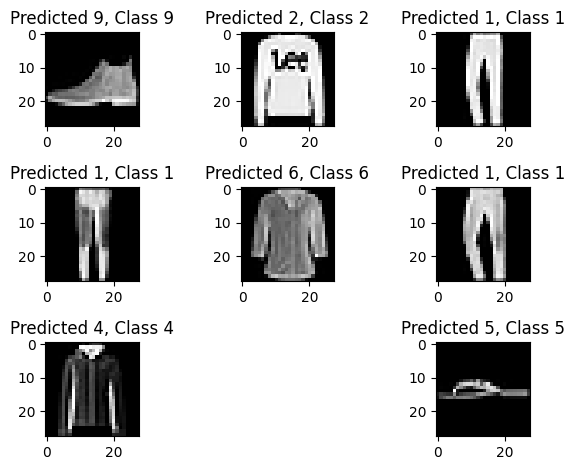

In [95]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct_indices = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels", len(correct_indices))
for i, correct_idx in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct_idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct_idx], test_Y[correct_idx]))
    plt.tight_layout()
plt.show()


Conclusion : CNN model performed very good with tanh as activation function and 5 epochs were enough to make the model learn. This is because the dataset was very less complicated with clear edges and easy to learn.